# Correlation Analysis of the used indexes

In [1]:
%matplotlib inline
import PIL
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
from sklearn import preprocessing

In [2]:
v_sp500 = pd.read_csv('S&P500.csv', parse_dates=True)
v_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [3]:
v_vix = pd.read_csv('VIX.csv', parse_dates=True)
v_vix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,24.360001,26.150000,23.980000,24.209999,24.209999,0
1,2000-01-04,24.940001,27.180000,24.799999,27.010000,27.010000,0
2,2000-01-05,27.980000,29.000000,25.850000,26.410000,26.410000,0
3,2000-01-06,26.680000,26.709999,24.700001,25.730000,25.730000,0
4,2000-01-07,25.139999,25.170000,21.719999,21.719999,21.719999,0


In [4]:
sp500_vix_close_corr = v_sp500['Close'].corr(v_vix['Close'])
sp500_vix_close_corr

-0.4310796856085801

In [5]:
np.correlate(v_sp500['Close'], v_vix['Close'], mode='full')

array([111251.56241729, 217451.41198503, 333753.42759707, ...,
       189415.44597589, 126004.3695894 ,  58058.00097448])

In [6]:
sp500_vix_close_vol_corr = v_sp500['Volume'].corr(v_vix['Close'])
sp500_vix_close_vol_corr

0.3013120396261478

In [7]:
v_monthly_EMV_index =  pd.read_excel('EMV_Data.xlsx') 
v_monthly_EMV_index = v_monthly_EMV_index[:-1]
v_monthly_EMV_index.head()

,Year,Month,Overall EMV Tracker,Policy-Related EMV Tracker,Infectious Disease EMV Tracker,Macroeconomic News and Outlook EMV Tracker,Macro – Broad Quantity Indicators EMV Tracker,Macro – Inflation EMV Indicator,Macro – Interest Rates EMV Tracker,Macro – Other Financial Indicators EMV Tracker,...,Housing and Land Management EMV Tracker,Other Regulation EMV Tracker,National Security Policy EMV Tracker,Government-Sponsored Enterprises EMV Tracker,Trade Policy EMV Tracker,Healthcare Policy EMV Tracker,Food and Drug Policy EMV Tracker,"Transportation, Infrastructure, and Public Utilities EMV Tracker",Elections and Political Governance EMV Tracker,Agricultural Policy EMV Tracker
0,1985,1,11.304017,5.397642,0.322972,8.074298,2.018574,4.037149,4.037149,0.645944,...,0.080743,0.080743,1.049659,0.322972,0.080743,0.484458,0.080743,0.242229,0.161486,0.080743
1,1985,2,9.461739,4.269774,0.323478,7.278260,1.617391,2.911304,2.911304,0.404348,...,0.080870,0.161739,2.345217,0.323478,0.080870,0.970435,0.000000,0.242609,0.323478,0.080870
2,1985,3,10.997636,4.873834,0.578823,7.524698,2.149914,3.721005,3.638316,0.248067,...,0.082689,0.413445,0.744201,0.578823,0.165378,0.248067,0.000000,0.000000,0.082689,0.082689
3,1985,4,9.267448,4.496748,0.142576,7.342671,1.924778,2.423794,3.920844,0.356440,...,0.000000,0.356440,0.712881,0.570305,0.142576,0.071288,0.000000,0.285152,0.142576,0.000000
4,1985,5,9.836281,4.316045,0.330077,7.459730,2.574597,2.574597,3.960918,0.396092,...,0.066015,0.264061,0.924214,0.462107,0.132031,0.198046,0.132031,0.462107,0.132031,0.000000


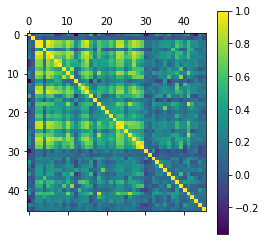

In [8]:
v_monthly_EMV_corr = v_monthly_EMV_index.corr()
plt.matshow(v_monthly_EMV_corr)
cb = plt.colorbar()
plt.show()


In [9]:
v_monthly_EMV_corr.head()

,Year,Month,Overall EMV Tracker,Policy-Related EMV Tracker,Infectious Disease EMV Tracker,Macroeconomic News and Outlook EMV Tracker,Macro – Broad Quantity Indicators EMV Tracker,Macro – Inflation EMV Indicator,Macro – Interest Rates EMV Tracker,Macro – Other Financial Indicators EMV Tracker,...,Housing and Land Management EMV Tracker,Other Regulation EMV Tracker,National Security Policy EMV Tracker,Government-Sponsored Enterprises EMV Tracker,Trade Policy EMV Tracker,Healthcare Policy EMV Tracker,Food and Drug Policy EMV Tracker,"Transportation, Infrastructure, and Public Utilities EMV Tracker",Elections and Political Governance EMV Tracker,Agricultural Policy EMV Tracker
Year,1.000000,-0.019067,0.136750,0.181919,0.144904,0.137243,0.256243,-0.132980,-0.104919,0.029641,...,0.373005,0.014654,0.110180,0.065257,0.279032,0.353143,-0.083430,-0.246262,0.267270,0.048661
Month,-0.019067,1.000000,0.026846,0.029739,-0.065726,0.032438,0.031699,-0.010923,0.035251,0.069384,...,0.070693,-0.007532,-0.005583,0.029968,0.062660,-0.017247,-0.039919,0.054674,0.137057,-0.044548
Overall EMV Tracker,0.136750,0.026846,1.000000,0.973533,0.330699,0.975228,0.881706,0.780221,0.759989,0.645070,...,0.369318,0.302134,0.561221,0.483828,0.260838,0.565008,0.331015,0.325705,0.189033,0.179492
Policy-Related EMV Tracker,0.181919,0.029739,0.973533,1.000000,0.291407,0.940893,0.870781,0.728871,0.729256,0.601658,...,0.378452,0.269204,0.629857,0.486581,0.336835,0.581829,0.320441,0.324915,0.242528,0.177131
Infectious Disease EMV Tracker,0.144904,-0.065726,0.330699,0.291407,1.000000,0.326276,0.354318,0.132107,0.159878,0.205235,...,0.159004,0.624616,0.339910,0.043281,0.064295,0.544978,0.441982,0.131383,0.115453,0.219028


In [10]:
v_sp500_normalized_scaled = preprocessing.normalize([np.array(v_sp500["Close"])])
v_vix_normalized_scaled = preprocessing.normalize([np.array(v_vix["Close"])])

In [22]:
v_sp500_normalized_scaled
print(np.sum((c**2 for c in v_sp500_normalized_scaled[0])))

1.000000000000001


C:\ProgramData\Anaconda2\envs\mestrado\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [12]:
v_vix_normalized_scaled
white_noise_scaled

array([[0.01587153, 0.01770714, 0.0173138 , ..., 0.05420969, 0.04976488,
        0.05011888]])

In [13]:
corr = signal.correlate(v_sp500_normalized_scaled, v_vix_normalized_scaled, mode='full')

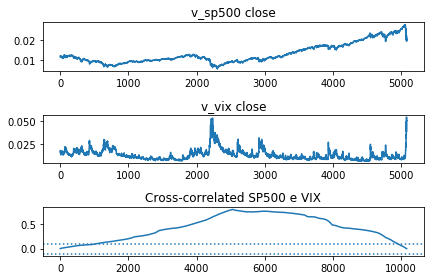

In [14]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1)
ax_orig.plot(v_sp500_normalized_scaled[0])
ax_orig.set_title('v_sp500 close')
ax_noise.plot(v_vix_normalized_scaled[0])
ax_noise.set_title('v_vix close')
ax_corr.plot(corr[0])
ax_corr.axhline(0.1, ls=':')
ax_corr.axhline(-0.1, ls=':')
ax_corr.set_title('Cross-correlated SP500 e VIX')
fig.tight_layout()
#fig.show()
plt.show()

In [15]:
v_sp500_normalized = preprocessing.normalize([np.array(v_sp500["Volume"])])
v_vix_normalized = preprocessing.normalize([np.array(v_vix["Close"])])

In [16]:
corr = signal.correlate(v_sp500_normalized, v_vix_normalized, mode='full')

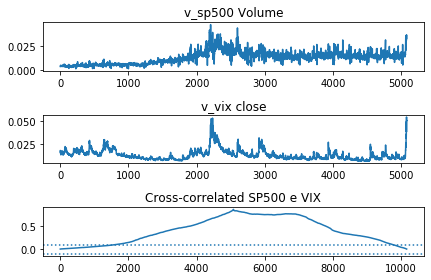

In [17]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1)
ax_orig.plot(v_sp500_normalized[0])
ax_orig.set_title('v_sp500 Volume')
ax_noise.plot(v_vix_normalized[0])
ax_noise.set_title('v_vix close')
ax_corr.plot(corr[0])
ax_corr.axhline(0.1, ls=':')
ax_corr.axhline(-0.1, ls=':')
ax_corr.set_title('Cross-correlated SP500 e VIX')
fig.tight_layout()
#fig.show()
plt.show()

In [18]:
v_monthly_EMV_normalized = preprocessing.normalize([np.array(v_monthly_EMV_corr["Overall EMV Tracker"])])
v_vix_normalized = preprocessing.normalize([np.array(v_vix["Close"])])

In [19]:
corr = signal.correlate(v_monthly_EMV_normalized, v_vix_normalized_scaled, mode='full')

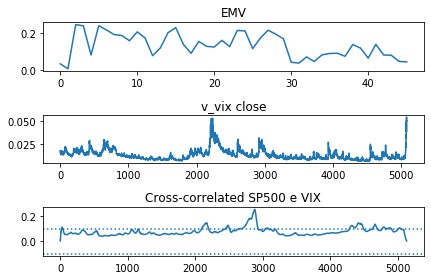

In [20]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1)
ax_orig.plot(v_monthly_EMV_normalized[0])
ax_orig.set_title('EMV')
ax_noise.plot(v_vix_normalized_scaled[0])
ax_noise.set_title('v_vix close')
ax_corr.plot(corr[0])
ax_corr.axhline(0.1, ls=':')
ax_corr.axhline(-0.1, ls=':')
ax_corr.set_title('Cross-correlated SP500 e VIX')
fig.tight_layout()
#fig.show()
plt.show()